# Resources

- https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/recommendation_systems/labs/wals.ipynb
- https://medium.com/@zaiinn440/one-stop-guide-for-production-recommendation-systems-9491f68d92e3
- https://medium.com/@javiersospedralegarda/building-a-simple-collaborative-filtering-recommendation-system-with-tensorflow-666d407f1b9a

# Import Libraries

In [10]:
import pandas as pd
import numpy as np

import tensorflow_recommenders as tfrs

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Import Data

In [3]:
df_ratings = pd.read_csv('/Users/ani/Projects/5_recommendation_system/data/ratings_small.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


# EDA

In [4]:
print(f'Number of unique users: {df_ratings.userId.nunique()}')
print(f'Number of unique movies: {df_ratings.movieId.nunique()}')

Number of unique users: 671
Number of unique movies: 9066


In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
df_ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [9]:
df_ratings['rating'].sort_values().unique()

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

<Axes: xlabel='rating'>

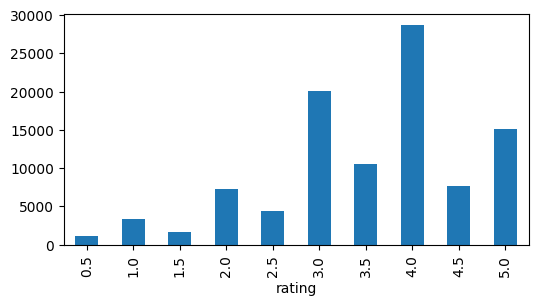

In [19]:
df_plot = df_ratings.groupby('rating', as_index=False).count()[['rating', 'userId']].rename(columns={'userId': 'count'})
df_plot.plot(x='rating', y='count', kind='bar', legend=False, figsize=(6, 3))